In [16]:
using CSV
file1 = "./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_training_set.csv"
file2 = "./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_testing_set.csv"
file3 = "./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_validation_set.csv"
raw1 = CSV.read(file1);
raw2 = CSV.read(file2);
raw3 = CSV.read(file3);

raw = vcat(raw1, raw2, raw3)

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding,Close
,String⍰,Any,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,AAL,2012-12-31,3068000000,-222000000,-1961000000,23,-1888000000,4695000000,53,1330000000,0,127000000,1.0499e10,78,0,223000000,1001000000,-1813000000,-2445000000,0,0,1.3402e10,0.0,58,1.4356e10,-569000000,8.69e8,632000000,580000000,306000000,473000000,7.116e9,0.0,0,0,-1020000000,197000000,1285000000,483000000,-1571000000,-1876000000,2050000000,-1876000000,-4084000000,1124000000,386000000,148000000,1,2167000000,626000000,4524000000,-2980000000,1509000000,11000000,15147000000,-141000000,845000000,10,31,8,72,0,-9.462e9,0,12977000000,1419000000,3.412e9,2.351e10,7.072e9,9011000000,-7.987e9,2.4891e10,1.6904e10,2.4855e10,-3.67e8,-5.6,3.35e8,13.5
2,AAL,2013-12-31,4975000000,-93000000,-2723000000,67,-3114000000,10592000000,75,2175000000,0,5000000,1.1019e10,104,0,935000000,1020000000,-1324000000,-2180000000,0,0,1.9259e10,4.086e9,59,1.5724e10,-346000000,2.311e9,856000000,1012000000,-1181000000,-235000000,1.5353e10,0.0,0,0,2208000000,660000000,675000000,3799000000,-3814000000,-1834000000,1873000000,-1834000000,-4489000000,1560000000,559000000,1399000000,5,2299000000,1465000000,7385000000,-2032000000,1711000000,481000000,14915000000,-56000000,853000000,8,80,7,96,0,-1.1296e10,0,12913000000,1446000000,8.111e9,4.2278e10,1.4323e10,13806000000,-2.731e9,4.5009e10,4.2278e10,2.6743e10,0.0,-11.25,1.63022e8,25.25
3,AAP,2012-12-29,2409453000,-89482000,600000,32,-271182000,520215000,23,598111000,-260298000,7000,3.10697e9,124,0,0,189544000,657915000,624074000,0,0,1.29255e9,7.6389e7,50,3.09804e9,236404000,2.8845e7,33841000,2308609000,0,426323000,6.04461e8,0.0,0,0,177445000,540210000,685281000,127907000,-272978000,387670000,23311000,387670000,387670000,229866000,0,657315000,11,31833000,47614000,149558000,2667000,-33499000,-1796000,239021000,8213000,0,10,52,6,34,0,7.149e8,-18600000,2440721000,627000,0.0,4.61381e9,3.1842e9,2559638000,1.21069e9,3.40312e9,4.61381e9,6.205e9,-2.7095e7,5

In [17]:
#raw[:,78]

In [18]:
A = []

for i in 3:76
    push!(A, raw[:,i])
end

A

74-element Array{Any,1}:
 Union{Missing, Int64}[3068000000, 4975000000, 2409453000, 2609239000, 3757085000, 36223000000, 59321000000, 6448000000, 14870635000, 24670159000  …  657762000, 396636000, 1728410000, 321082000, 35214000000, 463900000, 2265000000, 1143349000, 2165000000, 432000000]        
 Union{Missing, Int64}[-222000000, -93000000, -89482000, -32428000, -21476000, -1949000000, 1044000000, 681000000, -2312518000, -912724000  …  47011000, 186699000, 139451000, 21219000, 4692000000, -900000, 408000000, -39065000, -54000000, -56100000]                        
 Union{Missing, Int64}[-1961000000, -2723000000, 600000, 2698000, -7484000, 1156000000, 1348000000, -54000000, -44000, 5048000  …  -70484000, 24822000, 87584000, 0, 1750000000, 10400000, 0, -64682000, 0, -27500000]                                                           
 Union{Missing, Int64}[23, 67, 32, 26, 19, 30, 36, 92, 19, 67  …  174, 86, 9, 25, 9, 11, 5, 15, 142, 1]                                                  

In [19]:
B = zeros(length(A),length(A[1]))

for i in 1:length(A)
    for j in 1:length(A[i])
        B[i,j] = A[i][j]
    end
end

In [20]:
B = B'
B

1232×74 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 3.068e9          -2.22e8     …  2.4855e10   -3.67e8      -5.6 
 4.975e9          -9.3e7         2.6743e10    0.0        -11.25
 2.40945e9        -8.9482e7      6.205e9     -2.7095e7     5.29
 2.60924e9        -3.2428e7      6.49381e9   -1.0789e8     5.36
 3.75709e9        -2.1476e7      9.73702e9   -1.19709e8    6.45
 3.6223e10        -1.949e9    …  1.71e11      0.0         40.03
 5.9321e10         1.044e9       2.16e11      0.0          8.35
 6.448e9           6.81e8        1.879e10    -3.2e8        2.58
 1.48706e10       -2.31252e9     8.79592e10  -1.51686e9    1.88
 2.46702e10       -9.12724e8     1.47e11     -4.39601e9    6.73
 1.0889e10         3.6e7      …  1.905e10    -5.591e9      3.76
 5.948e9          -1.13e8        1.9657e10   -6.844e9      1.64
 7.29257e8         3.3649e7      4.05524e9   -3.64319e9    0.58
 ⋮                            ⋱                                
 8.75e8            1.7e7      …  7.082e9      0

In [21]:
prices = raw[:78]
shares = raw[:77]

mkt_cap = prices.*shares
y = mkt_cap

1232-element Array{Float64,1}:
 4.5225e9             
 4.1163111105499997e9 
 5.2405070845259075e9 
 8.033962420493641e9  
 1.1046686916792408e10
 6.38079013826423e10  
 6.16692422074763e11  
 8.44960016e10        
 1.4095477040689575e10
 1.71393912657483e10  
 4.984001182011525e10 
 6.0206149470773415e10
 2.8388531049987858e10
 ⋮                    
 1.7044808987484e10   
 8.583359306258436e9  
 7.001096109288057e9  
 8.306781057429774e9  
 1.8223121828267998e10
 1.1242828328632e10   
 3.269850523658344e11 
 8.539396365504609e9  
 1.199671429027e10    
 3.1246348837061348e10
 2.3160433761956726e10
 1.9334268480868847e10

In [22]:
prices

1232-element Array{Union{Missing, Float64},1}:
  13.5              
  25.25             
  71.510002         
 109.91999799999999 
 150.509995         
  68.9642868571     
 112.709999         
  52.810001         
  61.099998         
  80.779999         
  31.426873131199997
  38.330002         
  56.779999         
   ⋮                
  29.98             
  72.650002         
  69.190002         
  89.379997         
  35.91             
  42.32             
  77.949997         
  60.849998         
  10.63             
  33.259998         
  53.19914019       
 102.589996         

In [23]:
# using Pkg
# Pkg.add("Ipopt")
#Pkg.build("Gurobi")

In [34]:
# NOTE: must have either Gurobi or Mosek installed!

# Solve the LEAST SQUARES polynomial fit

using JuMP, Ipopt
#,Mosek Ipopt, Gurobi

#m = Model(solver=ClpSolver())
#m = Model(solver=MosekSolver(LOG=0))
#m = Model(solver=GurobiSolver(OutputFlag=0,BarHomogeneous=1))
#m = Model(solver=GurobiSolver(OutputFlag=0,NumericFocus=3,BarHomogeneous=1))
m = Model(solver=IpoptSolver())

@variable(m, u[1:74])
#@constraint(m, bound[i in 1:74],u[i] <= 100000)
@objective(m, Min, 1/1000000000000000 * sum( (y - B*u).^2 ) )

status = solve(m)
uopt = getvalue(u)
println(status)
println(getobjectivevalue(m))
println(uopt)

This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:  6746432

Total number of variables............................:       74
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [10]:
save = uopt

save2 = [-0.904596, 4.02153, -4.34669, -3.4652e-5, -1.14616, 2.05439, 6.68269e-5, 2.41002, -1.49384, 0.674424, -13.3776, 0.0001256, -4.24663, -4.57412, -6.17971, -8.12698, 10.9355, -9.08895, 5.40283, -4.88962, -4.90969, 1.5144e-5, -12.9373, 0.896526, -5.44573, -19.0791, 0.0910465, 2.38582, 2.05383, -0.14202, -5.41484, -0.81778, -7.46986, -5.51625, -5.48231, 1.85351, 6.62424, 1.50986, -9.65292, 9.92502, 15.526, 1.54486, -2.31853, -5.58275, -2.53421, 5.87858e-6, -0.239388, -2.89789, -1.40539, 2.08033, -3.04955, 2.75532, -3.01444, 13.6965, 0.339098, 8.62275e-6, -4.28941e-5, 6.57062e-6, 0.000111392, 2.64309, 0.589265, -2.24175, 0.415502, 1.39655, 1.13279, 1.46218, -4.73024, -0.913433, -24.0713, -20.7114, 26.8983, 13.2183, -0.252534, -1.84834e-7]

74-element Array{Float64,1}:
   -3.2968458288809757  
    2.1039233156959605  
   -2.8798890420640695  
   -4.710946287874024e7 
  214.78856853320923    
    2.2992478015428515  
   -2.154712621993699e7 
  129.44857473185635    
   -1.866120816099335   
    0.8783916291332114  
  -62.63355971223919    
   -1.0470435826426757e7
   54.543614253909      
    ⋮                   
    0.49559443560347594 
    0.0                 
  128.2946880952503     
  -53.98282592281477    
  -78.38197456618977    
    2.9655165221654203  
 -156.82363531936204    
 -155.60382101475793    
  160.84037636094504    
   62.46170869031843    
    0.1946569891712229  
   -7.096294621575892e7 

In [11]:
test = "./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_testing_set.csv"
raw2 = CSV.read(test)

raw2

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding,Close
,String⍰,Dates…⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,AAL,2014-12-31,4668000000,-160000000,-150000000,143,-5311000000,15135000000,60,1768000000,0,7000000,1.562e10,88,0,829000000,1342000000,4099000000,3212000000,0,0,2.3084e10,4091000000,63,2.703e10,330000000,2240000000,887000000,1004000000,1799000000,-1026000000,1.6043e10,0.0,0,0,170000000,-146000000,3080000000,-315000000,-2911000000,2882000000,542000000,2882000000,2882000000,1771000000,800000000,4249000000,10,2060000000,898000000,7059000000,-4559000000,817000000,601000000,10928000000,-500000000,1295000000,8,159,7,80,0,-8.562e9,-1052000000,20686000000,1677000000,6309000000,4.3225e10,1.175e10,13404000000,2.021e9,4.1204e10,4.3225e10,4.265e10,0.0,4.02,7.16915e8,53.63
2,AAPL,2014-09-27,48649000000,-6452000000,980000000,35,-9571000000,0,40,13844000000,-76000000,23313000000,1.12e11,108,0,3031000000,7946000000,53483000000,53483000000,0,0,2.0624e10,4616000000,39,7.0537e10,13973000000,4142000000,0,2111000000,-9027000000,13408000000,2.8987e10,1.3e11,0,0,18266000000,-415000000,59713000000,-37549000000,-22579000000,39510000000,5210000000,39510000000,39510000000,31537000000,0,52503000000,29,3764000000,9806000000,8491000000,1082000000,-1158000000,-3981000000,24826000000,167000000,0,29,48,22,105,6041000000,8.7152e10,-44270000000,11993000000,6308000000,11233000000,2.32e11,6.8531e10,63448000000,1.12e11,1.2e11,2.32e11,1.83e11,0.0,6.49,6.08783e9,100.75
3,ABC,2014-09-30,17250160000,-938286000,-28594000,14,-264457000,2749185000,10,1808513000,-1304569000,2711000,1.17e11,97,0,241205000,196617000,753497000,669863000,0,0,8.99582e8,0,2,2.98237e9,388087000,3481744000,83634000,8593852000,-117794000,2310596000,1.99563e9,0.0,0,0,566402000,577507000,1464654000,-502992000,-384155000,274230000,912505000,274230000,281776000,6312883000,0,782091000,1,350652000,84957000,0,-52046000,0,-1904000,88287000,21107000,188680000,1,34,0,48,0,1.57043e9,-626020000,2011595000,0,0,2.15322e10,1.68002e10,1725

In [48]:
AAPL = raw2[302,3:76]

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share
,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
302,47165000000,3118000000,4511000000,19,-32952000000,0,7,4658000000,-1343000000,10792000000,2.67e11,82,0,39230000000,17297000000,51916000000,51630000000,-281000000,13323000000,2.53e11,0,32,1.27e11,18015000000,0,286000000,16678000000,1715000000,-6639000000,1.6978e10,3.5239e10,6665000000,0,6966000000,-28000000,45116000000,-17888000000,-26975000000,32520000000,3110000000,32520000000,45843000000,28009000000,1669000000,34082000000,9,8676000000,3565000000,0,-18957000000,115000000,4262000000,47588000000,-4042000000,17297000000,13,30,8,56,0,4.08e11,-13153000000,74226000000,17468000000,0,3.49e11,5.291e10,64633000000,1.74e11,1.75e11,3.49e11,3.94e11,-2.26e11,7.6


In [49]:
using LinearAlgebra
AAPL = convert(Array, AAPL)

┌ Warning: `convert(::Type{Array}, dfr::DataFrameRow)` is deprecated, use `permutedims(Vector(dfr))` instead.
│   caller = top-level scope at In[49]:2
└ @ Core In[49]:2


1×74 Array{Any,2}:
 47165000000  3118000000  4511000000  19  …  3.49e11  3.94e11  -2.26e11  7.6

In [53]:
AAPL_Test = AAPL * save

1-element Array{Any,1}:
 4.078281678041825e11

In [54]:
AAPL_shares = raw2[302,77]

4.278947368e9

In [55]:
AAPL_price = raw2[302, 78]

92.449997

In [56]:
AAPL_shares * AAPL_price

3.955886713347579e11

In [57]:
AAPL_Test/AAPL_shares

1-element Array{Float64,1}:
 95.31039592917529

### Part 2: 

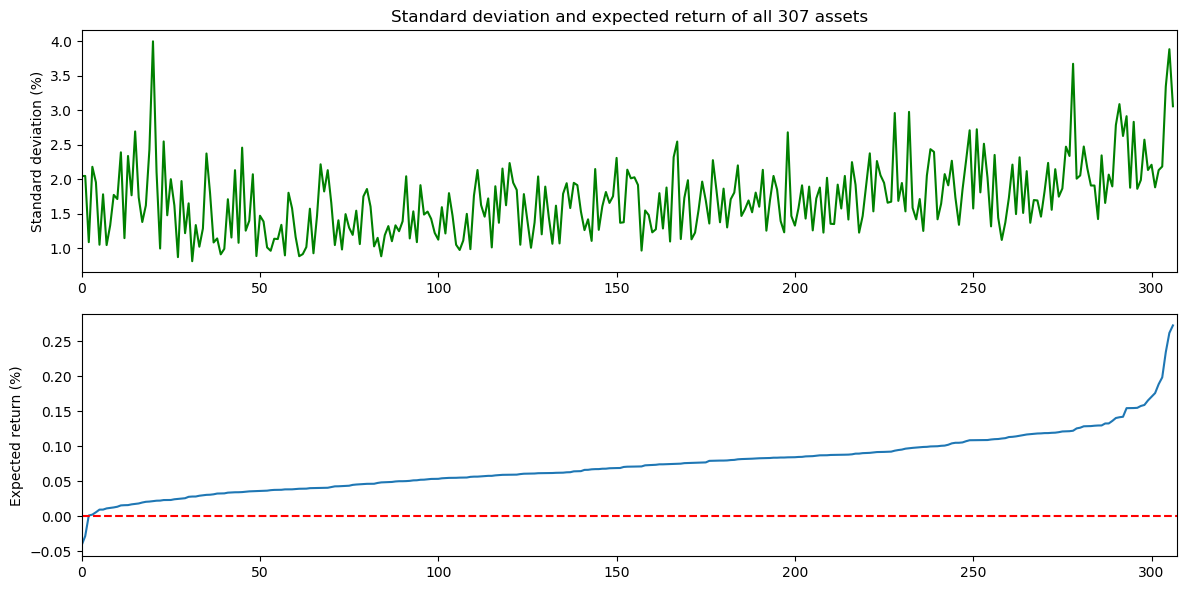

In [2]:
using CSV, LinearAlgebra

μ = convert(Vector, CSV.read("./nyse/Portfolio calculations/expected-return-risk.csv", header = true)[2])  # Expected return (in percent)
Σ = convert(Matrix, CSV.read("./nyse/Portfolio calculations/covariance-matrix.csv", header=false))   # Expected variance (in percent squared)
tickers = convert(Vector, CSV.read("./nyse/Portfolio calculations/expected-return-risk.csv", header = true)[1])  # Tickers

#ix = 1:307;   
ix = sortperm(μ) # get order of indices which will sort the assets by expected return
nAssets = 307

using PyPlot
fig = figure(figsize=(12,6))

subplot(211)
xlim(0,nAssets)
plot(sqrt.(diag(Σ))[ix],"g")
ylabel("Standard deviation (%)")
title("Standard deviation and expected return of all 307 assets")
tight_layout()

subplot(212)
xlim(0,nAssets)
plot(μ[ix])
plot([0,nAssets],[0,0],"r--")
ylabel("Expected return (%)")
tight_layout()
#savefig("folio1_vals.pdf")
;

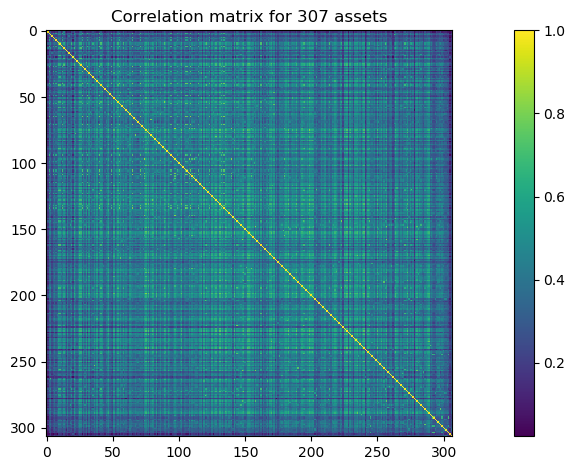

In [3]:
# plot correlation matrix (shows which assets are correlated with which other assets)
corr = diagm(0 => diag(Σ).^(-1/2))*Σ*diagm(0 => diag(Σ).^(-1/2))
imshow(corr[ix,ix]);colorbar();axis("image")
title("Correlation matrix for 307 assets")
tight_layout()
#savefig("folio2_cov.pdf")

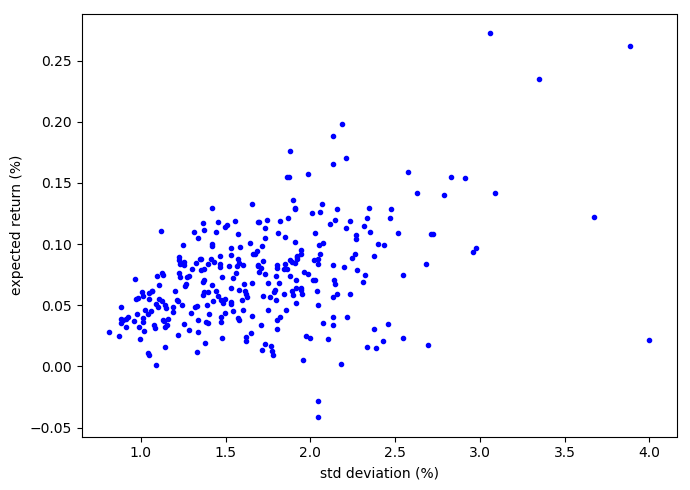

In [4]:
# plot each asset individually
figure(figsize=(7,5))
plot(sqrt.(diag(Σ)), μ, "b.")
xlabel("std deviation (%)")
ylabel("expected return (%)")
tight_layout()
#savefig("folio3_assets.pdf")
;

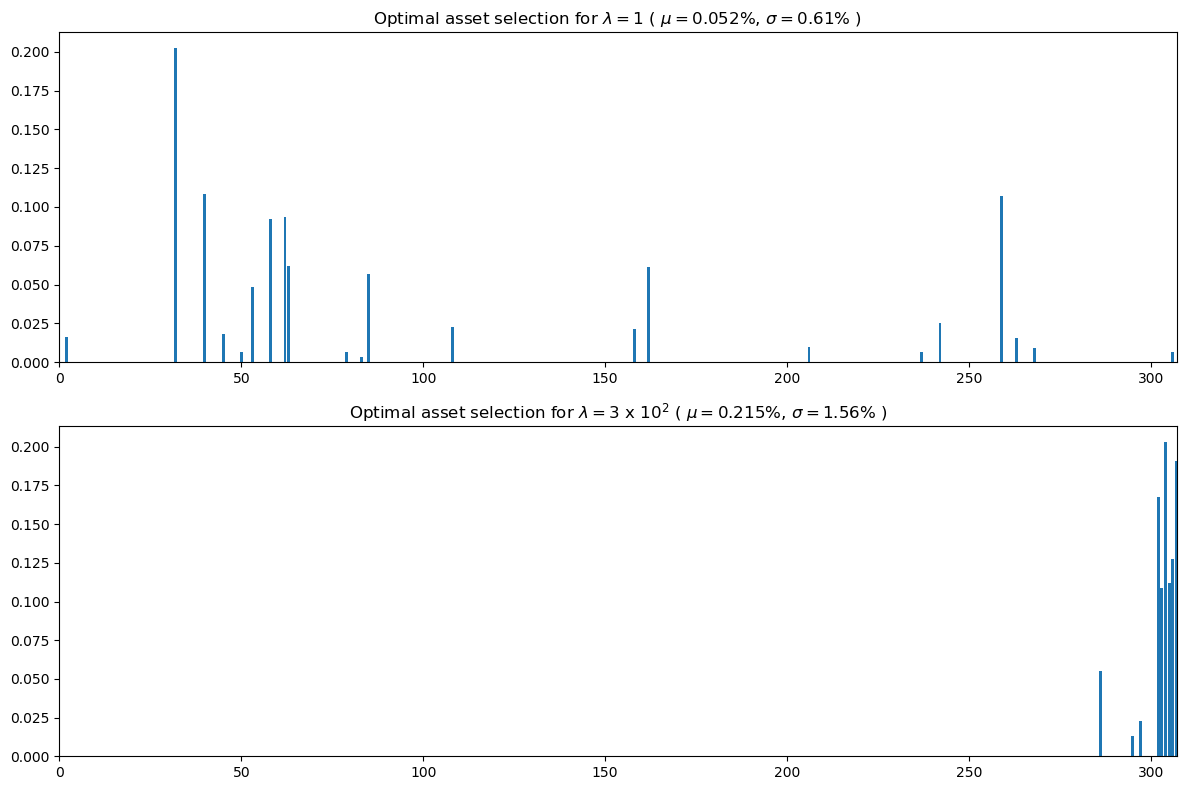

In [11]:
# find optimal portfolio for one particular choice of λ
using JuMP, Mosek
m = Model(solver = MosekSolver(LOG=0))
@variable(m, x[1:nAssets] >= 0) # Investment amounts non-negative (cannot sell short assets)
@constraint(m, sum(x) == 1)     # Must invest all of portfolio

figure(figsize=(12,8))

subplot(211)
λ = 1

@objective(m, Min, -dot(μ,x) + λ*dot(x,Σ*x) )
solve(m)
xsol1 = getvalue(x)
ix1 = findall(xsol1 .> 1e-4)
ret = dot(μ,xsol1)
std = sqrt(dot(xsol1,Σ*xsol1))
xlim(0,nAssets)
bar(1:nAssets,xsol1[ix])
title(string("Optimal asset selection for \$\\lambda=1\$"," ( \$\\mu=\$", round(ret,digits=3), "%, \$\\sigma=\$", round(std,digits=2), "% )"));
tight_layout()
subplot(212)
λ = 3e-2

@objective(m, Min, -dot(μ,x) + λ*dot(x,Σ*x) )
solve(m)
xsol2 = getvalue(x)
ix2 = findall(xsol2 .> 1e-4)
ret = dot(μ,xsol2)
std = sqrt(dot(xsol2,Σ*xsol2))
xlim(0,nAssets)
bar(1:nAssets,xsol2[ix])
title(string("Optimal asset selection for \$\\lambda=3\$ x \$ 10^{2}\$"," ( \$\\mu=\$", round(ret,digits=3), "%, \$\\sigma=\$", round(std,digits=2), "% )"));
tight_layout()




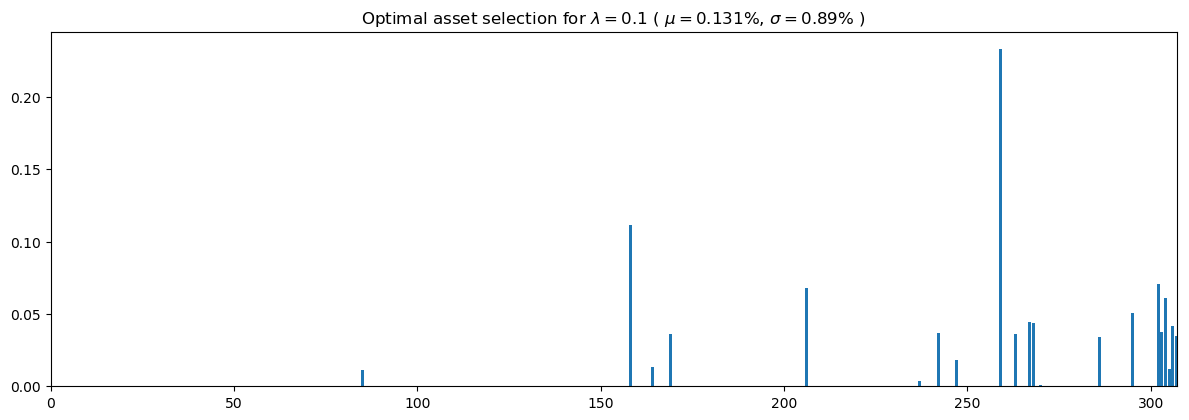

In [12]:
figure(figsize=(12,8))
subplot(211)
λ = 0.1

@objective(m, Min, -dot(μ,x) + λ*dot(x,Σ*x) )
solve(m)
xsol3 = getvalue(x)
ix3 = findall(xsol3 .> 1e-4)
ret = dot(μ,xsol3)
std = sqrt(dot(xsol3,Σ*xsol3))
xlim(0,nAssets)
bar(1:nAssets,xsol3[ix])
title(string("Optimal asset selection for \$\\lambda=0.1\$"," ( \$\\mu=\$", round(ret,digits=3), "%, \$\\sigma=\$", round(std,digits=2), "% )"));
tight_layout()


#savefig("folio4_optassets.pdf")

In [14]:
ix1

22-element Array{Int64,1}:
   2
   3
   4
  29
  42
  54
  76
  80
  85
 122
 158
 161
 168
 181
 191
 202
 203
 222
 252
 284
 287
 294

In [8]:
# compute optimal tradeoff curve (this may take a few seconds)
N = 50
ret = zeros(N)
std = zeros(N)
lambda_values = exp10.(range(-3,stop=4,length=N))

for (i,λ) in enumerate(lambda_values)
    @objective(m, Min, -dot(μ,x) + λ*dot(x,Σ*x) )
    solve(m)
    xsol = getvalue(x)
    ret[i] = dot(μ,xsol)
    std[i] = sqrt(dot(xsol,Σ*xsol))
end

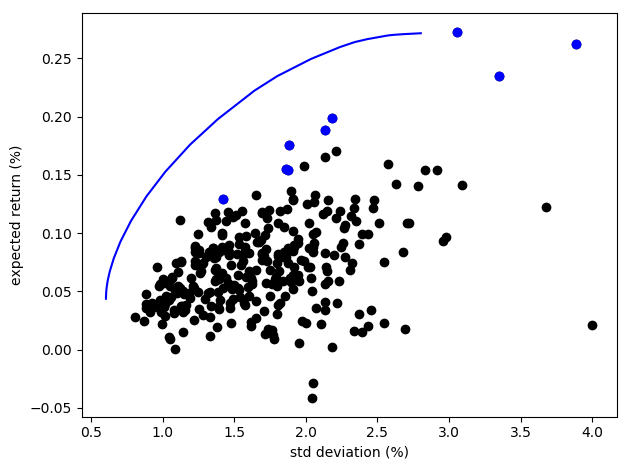

In [9]:
# plot tradeoff curve
plot(std,ret,"b-")
plot(sqrt.(diag(Σ)), μ, "k.", markersize=12)
#plot(sqrt.(diag(Σ))[ix1], μ[ix1], "r.", markersize=12)  # low-risk portfolio
plot(sqrt.(diag(Σ))[ix2], μ[ix2], "b.", markersize=12)  # at the "elbow" of the curve
xlabel("std deviation (%)")
ylabel("expected return (%)")
#axis([1.5,4.5,0,.4]);
tight_layout()
#savefig("folio5_pareto.pdf")

In [15]:
ix2

9-element Array{Int64,1}:
   1
  14
  37
  55
 121
 203
 213
 236
 270

In [5]:
function check_profits(ix, amount, prices_test, prices_val, xsol)
    profit = 0
    exp_returns = 0
    for i in 1:length(ix)
        company = tickers[ix[i]]
        init_price = prices_test[ix[i]]
        final_price = prices_val[ix[i]]
        invested = xsol[ix1[i]]*amount
        num_stocks = invested/init_price
        final_sell_price = num_stocks*final_price
        diff = final_sell_price - invested
        profit+=diff
        exp_returns = profit/amount
        println("Bought ", company, " at ", init_price, " sold: ", final_price)
    end
    println("Total profit: ", profit)
    println("Portfolio returns (percent) ", exp_returns)
end

check_profits (generic function with 1 method)

In [13]:
for i in 1:length(ix1)
    println("Company: - ", tickers[ix1[i]], " % Alloc: ", xsol1[ix1[i]]*100)
end


Company: - AAPL % Alloc: 0.9148079777273659
Company: - ABC % Alloc: 0.6244253244223325
Company: - ABT % Alloc: 0.3161307385332563
Company: - AZO % Alloc: 10.702945125512258
Company: - CAG % Alloc: 1.8221348321532893
Company: - CLX % Alloc: 4.832976270694808
Company: - DG % Alloc: 2.5109347674459275
Company: - DLTR % Alloc: 1.5747225192307652
Company: - DUK % Alloc: 0.6490482411674314
Company: - GIS % Alloc: 6.2225531353782095
Company: - KMB % Alloc: 5.6471129251125625
Company: - KR % Alloc: 0.986654372579879
Company: - LLY % Alloc: 2.2579439737010136
Company: - MCD % Alloc: 9.242059779937646
Company: - MO % Alloc: 2.1262902765260683
Company: - NEM % Alloc: 1.6419610562673905
Company: - NFLX % Alloc: 0.6801978332333121
Company: - PEP % Alloc: 9.354868790494749
Company: - SO % Alloc: 20.238820974708446
Company: - VRSK % Alloc: 6.144362453118707
Company: - VZ % Alloc: 0.6686840697298564
Company: - WMT % Alloc: 10.839814825606469


In [11]:
test_file = "./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_testing_set.csv"
val_file = "./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_validation_set.csv"
raw_test = CSV.read(test_file);
raw_val = CSV.read(val_file);

In [12]:
prices_test = convert(Vector, CSV.read(test_file, header = true)[78])  # Prices - testing
prices_val = convert(Vector, CSV.read(val_file, header = true)[78])  # Prices - validation

307-element Array{Union{Missing, Float64},1}:
  42.349998  
 114.709999  
  94.989998  
  44.91      
  92.169998  
  60.119999  
  36.68      
 276.570007  
  54.009998  
  43.23      
  52.630001  
  56.009998  
  80.510002  
   ⋮         
  29.98      
  72.650002  
  69.190002  
  89.379997  
  35.91      
  42.32      
  77.949997  
  60.849998  
  10.63      
  33.259998  
  53.19914019
 102.589996  

In [23]:
prices_test

307-element Array{Union{Missing, Float64},1}:
  53.630001         
 100.75             
  77.300003         
  45.02             
  73.68             
  49.619999         
  52.0              
 286.049988         
  51.25             
  46.130001         
  62.959998999999996
  60.130001         
  59.759997999999996
   ⋮                
  35.889998999999996
  85.760002         
 148.759995         
 106.0              
  35.919998         
  53.84             
  92.449997         
  53.27             
  13.86             
  50.509997999999996
  52.5808763479     
 113.41999799999999 

In [53]:
check_profits(ix1, 100000, prices_test, prices_val, xsol1)

Bought AAPL at 100.75 sold: 114.709999
Bought ABC at 77.300003 sold: 94.989998
Bought ABT at 45.02 sold: 44.91
Bought AZO at 538.840027 sold: 726.390015
Bought CAG at 24.599221789899996 sold: 30.04669105
Bought CLX at 91.400002 sold: 104.019997
Bought DG at 56.32 sold: 67.059998
Bought DLTR at 50.52 sold: 71.099998
Bought DUK at 83.540001 sold: 71.389999
Bought GIS at 53.810001 sold: 56.150002
Bought KMB at 115.540001 sold: 127.300003
Bought KR at 18.049999 sold: 34.5250015
Bought LLY at 68.989998 sold: 84.260002
Bought MCD at 93.699997 sold: 118.139999
Bought MO at 49.27 sold: 58.209999
Bought NEM at 18.9 sold: 17.99
Bought NFLX at 48.8014297142 sold: 114.379997
Bought PEP at 97.050003 sold: 100.540001
Bought SO at 49.110001000000004 sold: 46.790001
Bought VRSK at 64.050003 sold: 76.879997
Bought VZ at 46.779999 sold: 46.220001
Bought WMT at 74.68 sold: 84.980003
Total profit: 14066.17733096201
Portfolio returns (percent) 0.1406617733096201


In [54]:
check_profits(ix2, 100000, prices_test, prices_val, xsol2)

Bought AAL at 53.630001 sold: 42.349998
Bought ALXN at 185.029999 sold: 190.75
Bought BIIB at 339.450012 sold: 306.350006
Bought CMG at 684.51001 sold: 479.850006
Bought GILD at 94.260002 sold: 101.190002
Bought NFLX at 48.8014297142 sold: 114.379997
Bought ORLY at 192.619995 sold: 253.419998
Bought REGN at 410.25 sold: 542.869995
Bought TSCO at 77.91999799999999 sold: 85.669998
Total profit: -0.12109315829337436
Portfolio returns (percent) -1.2109315829337436e-6


In [51]:
check_profits(ix3, 100000, prices_test, prices_val, xsol3)

Total profit: 13222.494185645339
Portfolio returns (percent) 0.1322249418564534


In [6]:
using LinearAlgebra

function get_diff_expected_prices(coeffs, raw_test)
    actual_prices = raw_test[78]
    num_shares = raw_test[77]
    
    raw_temp = raw_test[:,3:76] #All fundamentals
    raw_temp = convert(Matrix, raw_temp)
    exp_valuations = raw_temp * coeffs
    exp_prices = exp_valuations ./ num_shares
    diff = (exp_prices - actual_prices)./actual_prices*100
    return diff
end

get_diff_expected_prices (generic function with 1 method)

In [7]:
using CSV
#IPOPT Zach
coeffs = [-6585.97, 5.19783, -2.08566, -2.34796e7, 175.366, 1.09387, -1.95368e7, 37.6399, 10.1514, 0.866736, -28.8113, 1.07816e7, 50.6525, -6.65774, 7.34417, -13.3521, 10.0877, 2.79358, 4.9708, 50.6117, 50.1046, 3.22441e7, -27.4894, 0.971842, 49.9912, -12.8875, 35.0389, 173.64, 13.5846, -4.14503, 49.9063, -4.62288, -9.04414, 4.11007, -15.2627, 5.8904, 9.54823, -160.26, -22.1404, 9.51734, 30.8563, 0.56197, 34.5639, 0.584742, 4.80161, -1.49687e8, 53.1586, 34.5638, -6588.73, 0.626721, 6.4768, 175.285, -6.03566, 8.35272, -0.72425, 1.25293e8, 1.65794e7, 1.94026e8, 1.76579e7, 0.585443, 0.670453, 3.29647, -0.522039, -6587.41, 37.0568, -48.3001, 14.1608, 6582.95, -59.9027, -54.3424, 57.739, 28.5186, 0.252042, -3.91443e8]

#Mosek
#coeffs = [-3.29685, 2.10392, -2.87989, -4.71095e7, 214.789, 2.29925, -2.15471e7, 129.449, -1.86612, 0.878392, -62.6336, -1.04704e7, 54.5436, -2.04819, -6.15197, 2078.11, -2096.01, -8.79425, 10.5703, 49.0736, 48.8301, 1.61191e7, -62.5332, 13.7874, 49.2048, -2114.64, 128.127, 217.775, 5.58733, 1.76512, 48.2034, 1.41479, -8.08089, -2.07809, -4.6603, 3.39356, 3.1628, -214.997, -50.5996, 8.55579, 55.723, 12.2455, 125.514, -5.33886, 7.06743, -5.26894e8, 53.8186, 125.442, -1.9223, 2.44833, -0.537384, 218.727, -0.0972079, 9.85327, -1.1946, 5.35222e8, 3.2696e7, -7.26781e6, 4.27104e7, 0.430482, 0.744881, 1.03829, 0.495594, 0.0, 128.295, -53.9828, -78.382, 2.96552, -156.824, -155.604, 160.84, 62.4617, 0.194657, -7.09629e7]

#coeffs = [-0.904596, 4.02153, -4.34669, -3.4652e-5, -1.14616, 2.05439, 6.68269e-5, 2.41002, -1.49384, 0.674424, -13.3776, 0.0001256, -4.24663, -4.57412, -6.17971, -8.12698, 10.9355, -9.08895, 5.40283, -4.88962, -4.90969, 1.5144e-5, -12.9373, 0.896526, -5.44573, -19.0791, 0.0910465, 2.38582, 2.05383, -0.14202, -5.41484, -0.81778, -7.46986, -5.51625, -5.48231, 1.85351, 6.62424, 1.50986, -9.65292, 9.92502, 15.526, 1.54486, -2.31853, -5.58275, -2.53421, 5.87858e-6, -0.239388, -2.89789, -1.40539, 2.08033, -3.04955, 2.75532, -3.01444, 13.6965, 0.339098, 8.62275e-6, -4.28941e-5, 6.57062e-6, 0.000111392, 2.64309, 0.589265, -2.24175, 0.415502, 1.39655, 1.13279, 1.46218, -4.73024, -0.913433, -24.0713, -20.7114, 26.8983, 13.2183, -0.252534, -1.84834e-7]
raw_test = CSV.read("./nyse/Fundamentals with Ratios FINAL/fundementals_with_ratios_testing_set.csv")

percent_diffs = get_diff_expected_prices(coeffs, raw_test)

307-element Array{Float64,1}:
    6.563590771205888
  -23.52959561655701 
  -14.313909699023403
  -39.508988745434536
  -40.34705297908548 
  -77.97238399498568 
  -13.590541114459349
 -118.07319036562976 
   23.68796853955907 
   37.88728076029415 
   53.59723132912625 
  126.69945013778386 
   41.11756822487075 
    ⋮                
  -20.75493560887353 
   51.31790275385114 
  -29.593615496055687
   27.833975169598972
   15.555459420771353
   32.83050565931303 
    3.727205894064902
   32.187651542946874
   15.209362122629166
   -8.883068193745576
  -24.807300584252225
   34.118884861166585

In [45]:
using LinearAlgebra
LUK = convert(Array, raw[343,3:76])
LUK*coeffs

┌ Warning: `convert(::Type{Array}, dfr::DataFrameRow)` is deprecated, use `permutedims(Vector(dfr))` instead.
│   caller = top-level scope at In[45]:2
└ @ Core In[45]:2


1-element Array{Any,1}:
 2.4288627420237488e10

In [37]:
for i in percent_diffs
    if i<=-100
        println(i)
    elseif i>=100
        println(i)
    end
end


#print(percent_diffs)

-118.07319036562976
126.69945013778386
129.0113081479887
141.3183945720686
150.4620307782261
-105.4320080489614
210.25139462882657
140.06776132911386
191.2584592895604
180.34139699096104
218.0334549180034
123.31810074442082
106.22597851910913
178.65125935800154
101.2654539307804
229.61329322825944
404.3516246569288
161.21964254245108
112.43274445549554
165.36928676184056
-249.7454199444017
248.58271353872877
107.69036748123881
190.5679207275639
189.04732041445556
103.19480714628907
142.28921907485875
130.3910076093639
152.23262727392603


In [31]:
maximum(percent_diffs)

680.9119091131016

In [32]:
using Statistics

mean(percent_diffs)
#percent_diffs[:]

-7.619837905791011

In [3]:
using CSV, LinearAlgebra

μ = convert(Vector, CSV.read("./nyse/Portfolio calculations/expected-return-risk.csv", header = true)[2])  # Expected return (in percent)
Σ = convert(Matrix, CSV.read("./nyse/Portfolio calculations/covariance-matrix.csv", header=false))   # Expected variance (in percent squared)
tickers = convert(Vector, CSV.read("./nyse/Portfolio calculations/expected-return-risk.csv", header = true)[1])  # Tickers

#ix = 1:307;   
ix = sortperm(μ) # get order of indices which will sort the assets by expected return
nAssets = 307


;

307-element Array{Union{Missing, Float64},1}:
 0.234597018
 0.117695555
 0.098874801
 0.046227911
 0.074223359
 0.052577043
 0.05108556 
 0.132471716
 0.08836685 
 0.037559155
 0.108491708
 0.062633381
 0.165430933
 ⋮          
 0.022936175
 0.136103307
 0.121432323
 0.110030318
 0.040038393
 0.056807244
 0.037463684
 0.035354193
 0.058229143
 0.087720932
 0.07282955 
 0.053134166

In [2]:
#import Pkg; Pkg.add("pyPlot")

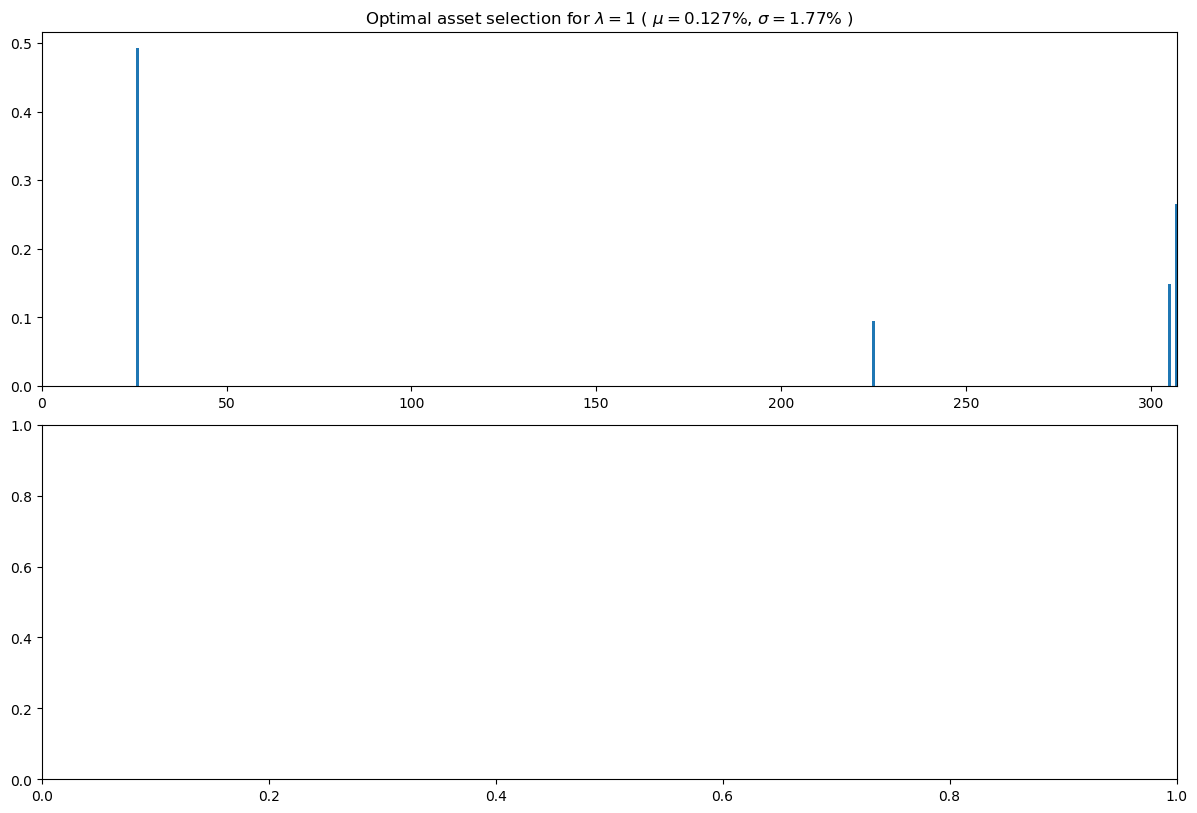

Minimization problem with:
 * 1 linear constraint
 * 307 variables
Solver is Mosek

In [33]:
# find optimal portfolio for one particular choice of λ
using JuMP, Mosek, PyPlot

m = Model(solver = MosekSolver(LOG=0))
@variable(m, x[1:nAssets] >= 0) # Investment amounts non-negative (cannot sell short assets)
@constraint(m, sum(x) == 1)     # Must invest all of portfolio

figure(figsize=(12,8))

subplot(211)
λ = 0.01
t2 = 0.0005
@objective(m, Min, -dot(μ,x) + λ*dot(x,Σ*x) - t2*dot(percent_diffs,x))
solve(m)
xsol1 = getvalue(x)
ix1 = findall(xsol1 .> 1e-4)
ret = dot(μ,xsol1)
std = sqrt(dot(xsol1,Σ*xsol1))
xlim(0,nAssets)
bar(1:nAssets,xsol1[ix])
title(string("Optimal asset selection for \$\\lambda=1\$"," ( \$\\mu=\$", round(ret,digits=3), "%, \$\\sigma=\$", round(std,digits=2), "% )"));
tight_layout()
subplot(212)
#λ = 3e-2

# @objective(m, Min, -dot(μ,x) + λ*dot(x,Σ*x) )
# solve(m)
# xsol2 = getvalue(x)
# ix2 = findall(xsol2 .> 1e-4)
# ret = dot(μ,xsol2)
# std = sqrt(dot(xsol2,Σ*xsol2))
# xlim(0,nAssets)
# bar(1:nAssets,xsol2[ix])
# title(string("Optimal asset selection for \$\\lambda=3\$ x \$ 10^{2}\$"," ( \$\\mu=\$", round(ret,digits=3), "%, \$\\sigma=\$", round(std,digits=2), "% )"));
# tight_layout()


m

In [34]:
check_profits(ix1, 100000, prices_test, prices_val, xsol1)

Bought AAL at 53.630001 sold: 42.349998
Bought EW at 63.6899985 sold: 78.980003
Bought LUK at 22.42 sold: 17.389999
Bought REGN at 410.25 sold: 542.869995
Total profit: -3292.1400883606657
Portfolio returns (percent) -0.03292140088360666


In [35]:
dot(μ,xsol1)

0.12721522481874964

In [36]:
dot(xsol1,Σ*xsol1)

3.1468774306988636

In [37]:
dot(percent_diffs,xsol1)

203.52126768687225

In [54]:
xsol1

UndefVarError: UndefVarError: xsol1 not defined

In [147]:
raw_test[173,:]

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding,Close
,String⍰,Dates…⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
173,LUK,2014-12-31,10516491000,-499310000,1653010000,2,-600837000,5059508000,87,7721449000,0,367499000,8.02429e9,131,1712535000,0,139744000,1346818000,381222000,-10525000,138527000,7.26376e8,0,25,2.65761e9,165971000,2720763000,965596000,0,1058274000,3898726000,8.52793e9,1.99404e9,67864000,186686000,1038773000,369180000,-987160000,917782000,449083000,199025000,285318000,204306000,215251000,3934825000,59695000,-444719000,4,1807284000,10785379000,19582167000,447082000,1921000,-8354000,0,-5010663000,185993000,4,4,2,131,0,4.42807e9,-22044000,2856642000,3315613000,21221259000,5.26239e10,4.36629e10,33414271000,1.03022e10,4.21968e10,5.24989e10,1.06819e10,0.0,0.54,3.68565e8,22.42
